In [31]:
import pandas as pd
from sklearn.cluster import KMeans
import json

In [32]:
property ="dielectric"
# property ="elasticity"
# property ="perovskites"
file_path = f'OFM_{property}_SparseXsingle_target_clusters50.json'
n_clusters=50
df = pd.read_csv(f"OFM_{property}_property.csv")



y = df['property'].values
excluded = ["0","1", "property"]
X = df.drop(excluded, axis=1)

In [33]:
y.shape

(4764,)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Generate a random dataset
# np.random.seed(42)
# X = np.random.rand(100, 50)  # 100 samples with 50 features

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)

(4764, 2)


In [35]:
X_tsne = pd.DataFrame(X_tsne, columns = ["X","Y"])
X_tsne = X_tsne.reset_index(drop=True)
print(X_tsne)

              X          Y
0    -26.454432 -33.257961
1    -21.278999 -38.273891
2    -17.341425 -37.380138
3     11.703708  83.022316
4      4.027568 -29.452116
...         ...        ...
4759  37.079552 -19.661655
4760  53.877811  12.123103
4761  -9.225509   5.725760
4762  -7.319340 -21.011417
4763  -7.535542  47.375862

[4764 rows x 2 columns]


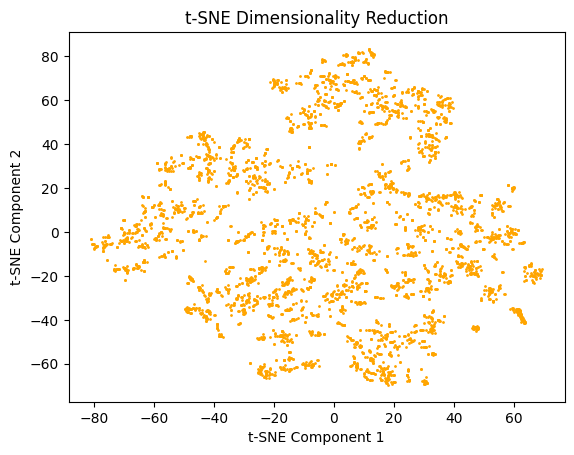

In [36]:
# Plot the reduced-dimensional data
plt.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1], s=1, color="orange")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Dimensionality Reduction')
plt.show()


/var/folders/_1/z9htdvys25dbgnl4nfxmvhf80000gn/T/ipykernel_53325/529003638.py:15: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde = kde.gaussian_kde(df.T)


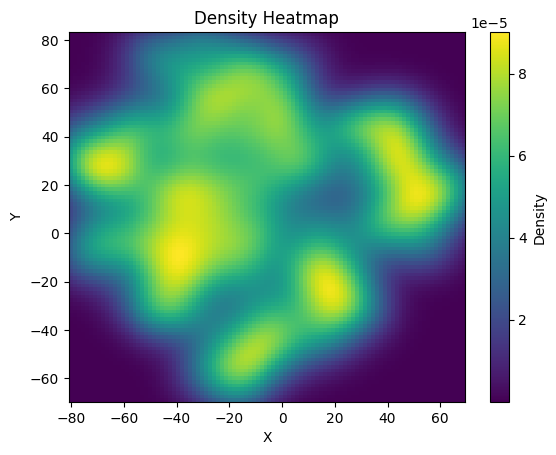

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde

# Generate some random data
# np.random.seed(42)
# x = np.random.normal(0, 1, 100)
# y = np.random.normal(0, 1, 100)

# Create DataFrame with the points
df = X_tsne

# Calculate the density using kernel density estimation
kde = kde.gaussian_kde(df.T)

# Define the grid for evaluation
x_grid, y_grid = np.mgrid[df['X'].min():df['X'].max():100j, df['Y'].min():df['Y'].max():100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Evaluate the density on the grid
density = np.reshape(kde(positions).T, x_grid.shape)

# Plot the density heatmap
plt.imshow(density, origin='lower', aspect='auto', extent=[df['X'].min(), df['X'].max(), df['Y'].min(), df['Y'].max()])
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Density Heatmap')

# Show the plot
plt.show()


In [38]:
# Evaluate the density at each sample position
densities = kde(X_tsne.T)

density_dict = {}

# Print the density values for each sample position
for i in range(len(X_tsne)):
    density = densities[i]
    #print(f"Density at sample position {i+1}: {density}")
    
    density_dict[i] = density

#print(density_dict)

sorted_density = sorted(density_dict.items(), key=lambda x: x[1])
#print(sorted_density)
top500 = [x[0] for x in sorted_density[:500]]
X_sparse = X.iloc[top500]
print(X_sparse.shape)

(500, 1024)


In [39]:
id_map = {}

for i, index in enumerate(top500):
    id_map[i] = top500[i]
    
id_map

{0: 4603,
 1: 3978,
 2: 3683,
 3: 3814,
 4: 3384,
 5: 3106,
 6: 1409,
 7: 3356,
 8: 404,
 9: 1043,
 10: 2907,
 11: 136,
 12: 1006,
 13: 3937,
 14: 2158,
 15: 4753,
 16: 1949,
 17: 1689,
 18: 3370,
 19: 3107,
 20: 2653,
 21: 3124,
 22: 1331,
 23: 1379,
 24: 2925,
 25: 2506,
 26: 3785,
 27: 3361,
 28: 4723,
 29: 3768,
 30: 493,
 31: 3981,
 32: 481,
 33: 20,
 34: 4681,
 35: 2339,
 36: 2103,
 37: 2996,
 38: 3150,
 39: 749,
 40: 1709,
 41: 2882,
 42: 4006,
 43: 3983,
 44: 2100,
 45: 3392,
 46: 1004,
 47: 2380,
 48: 171,
 49: 4063,
 50: 156,
 51: 1350,
 52: 2513,
 53: 3244,
 54: 1339,
 55: 3625,
 56: 3165,
 57: 677,
 58: 1852,
 59: 3727,
 60: 4078,
 61: 4057,
 62: 364,
 63: 1291,
 64: 2075,
 65: 2102,
 66: 2990,
 67: 1734,
 68: 630,
 69: 1443,
 70: 460,
 71: 4010,
 72: 4610,
 73: 2751,
 74: 3479,
 75: 3650,
 76: 3148,
 77: 4634,
 78: 2032,
 79: 2205,
 80: 4701,
 81: 4492,
 82: 4597,
 83: 2411,
 84: 1841,
 85: 4086,
 86: 4602,
 87: 3849,
 88: 1387,
 89: 2402,
 90: 3449,
 91: 852,
 92: 709,
 9

In [40]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, max_iter=500, random_state=222)
kmeans.fit(X_sparse)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Print cluster labels and centers
print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

# Create a dictionary to store the cluster assignments
cluster = {}
print(labels)
for i, cluster_id in enumerate(labels):
    if cluster_id in cluster:
        #cluster[int(cluster_id)].append(i)
        continue
    else:
        cluster[int(cluster_id)] = [id_map[i]]

# Print the size of each cluster
for key in sorted(cluster):
    print(key, (cluster[key]))

# Example: Print formulas in cluster 0
# for index in cluster[0]:
#     print(df_data.iloc[index]["formula"])

# Save the dictionary to a file in JSON format
with open(file_path, 'w') as file:
    json.dump(cluster, file)

/Users/jason/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels: [20 15 20 20 20 20 15 15 20 20 47 33 33 33 33 15 47 15 15 20 15 47 47 47
 15 47 47 15 47 15 47 15 15  3 47  3  3  3  3  3  3  3 15  3  3 35 29 29
 29  3 36 36  3 29  3 35 35 35  3 29 29 29 42 42  3  3  3  6  6  6  6  6
  6 35  6 40  3 35  3 29 29  4 35  3 35  4 35 29 35 32  4 32 27 35  4 35
  3 41 41 41 35 35  4  4  4 35  3 35 29  4 35 29 35  3 17 29 17 45 45  3
 17 17  4  3 35 29 35 17 35  9 29 35  2  9 17 17 17 11 11 17  3  2  3 29
  2  4  4 46 17 35 46  3 46 46 46 35 46 35 21  2 30 30 35 30 30 21  3  3
 40 35 43 43  3  4 46  3  2  3  4  2 40  3 17 43 17 11 40  3  3  2 40 21
 40  4 21  3 40  3  2 40  3 40 46 11 11 11  3  3 43 11 11 43  2 40 40 40
 46 40  3 11 40 40 11 11  3 40 11 46  3  2  3 13 21 40  7 13 40 40  3  3
 46  7  1 40  3 40 11 35  7 46 11 11 13  3  3 37 10 13 40 49  7 49 49 40
  2  3  2  1 11 22 22 46 10 40  2 10 11 46  3 31 48  7 22 40 22  3  7 11
 46 46 22  3  3 40 46  1 13  7 25  2  2 22 31 25  2 25 25 25 25 46 13  2
  2 46 13 31  8 46  1  1 46 28 35 3